In [67]:
#Load Libraries
library("fUnitRoots")
library(lmtest)
library("forecast")
library(FitAR)

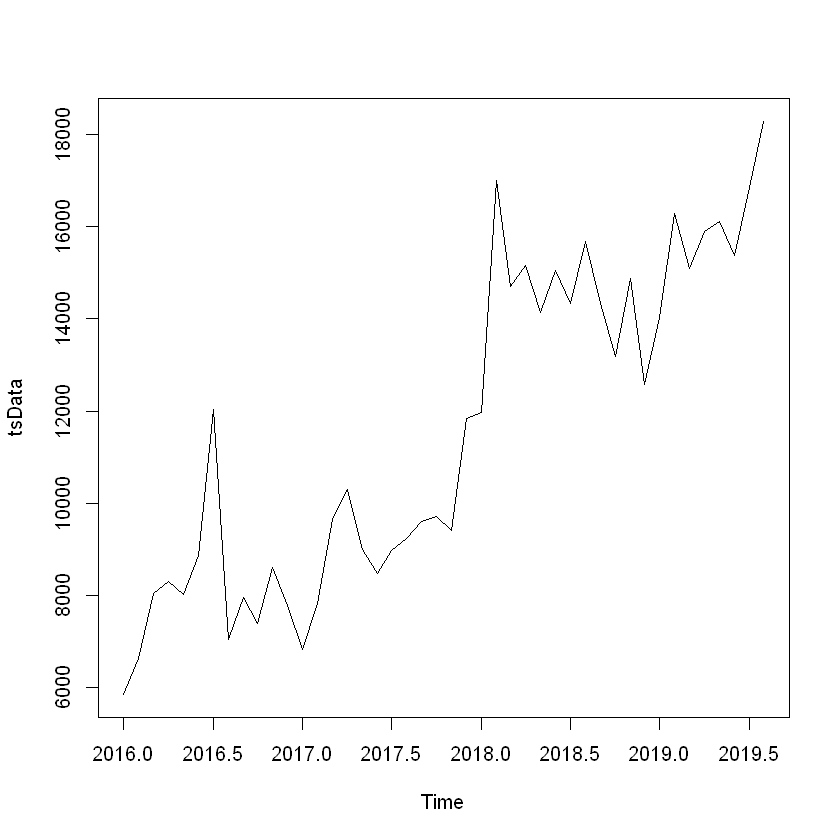

In [68]:
#import data
data<-read.csv("pg76.csv",header=TRUE)
tsData<- ts(data[2:45,2],start=c(2016,1),frequency=12)
plot(tsData)

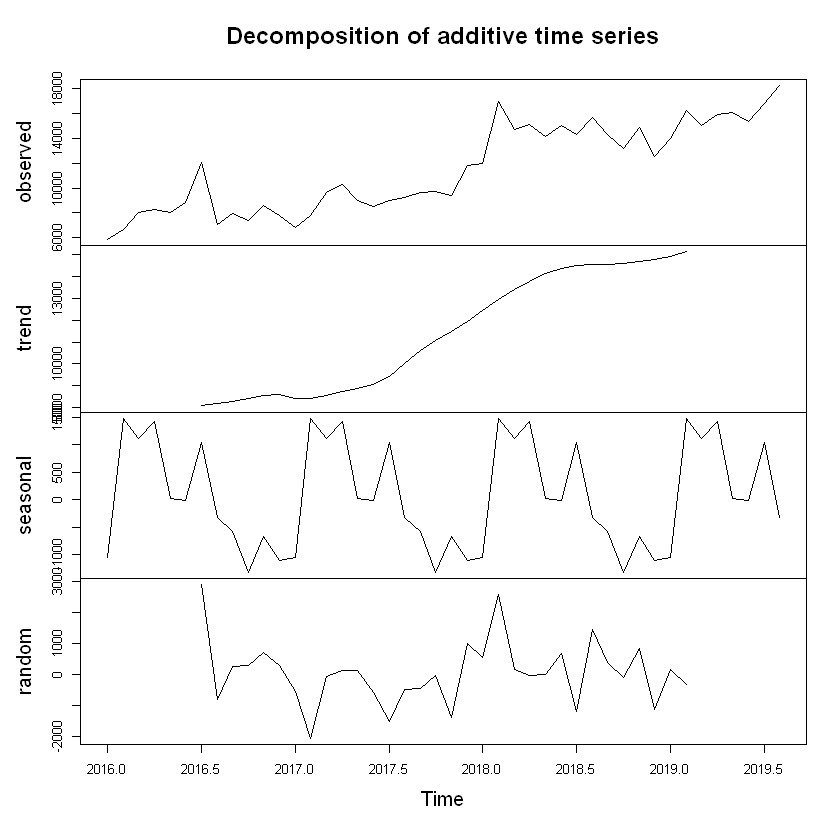

In [69]:
#decompose into time series components
timeseriescomponents <- decompose(tsData)
plot(timeseriescomponents)


Title:
 KPSS Unit Root Test

Test Results:
  NA

Description:
 Sun Nov 24 22:15:39 2019 by user: pdelague


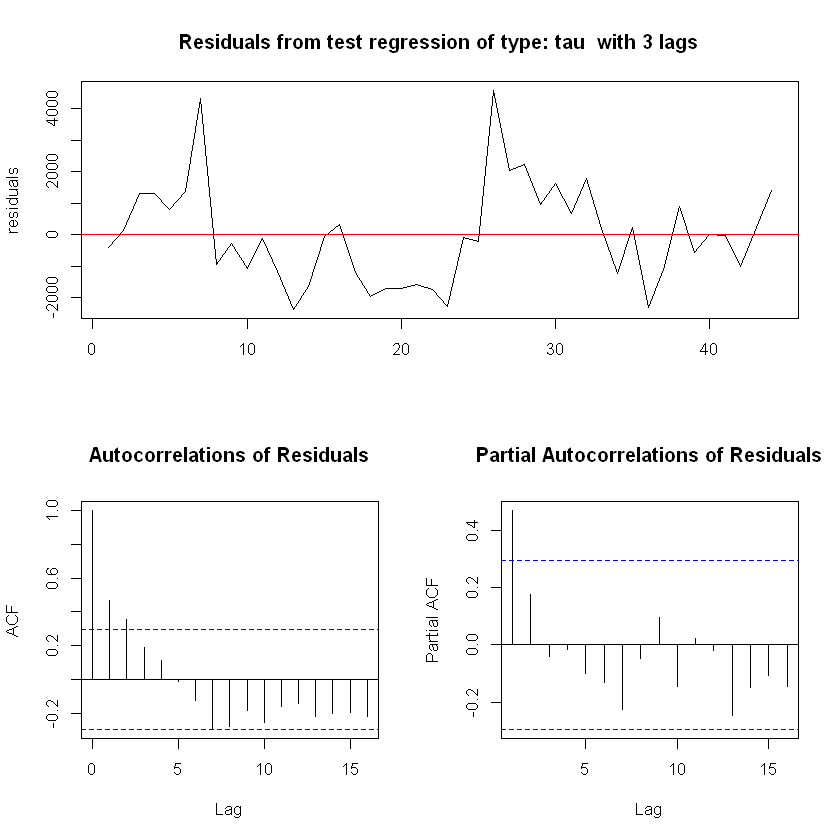

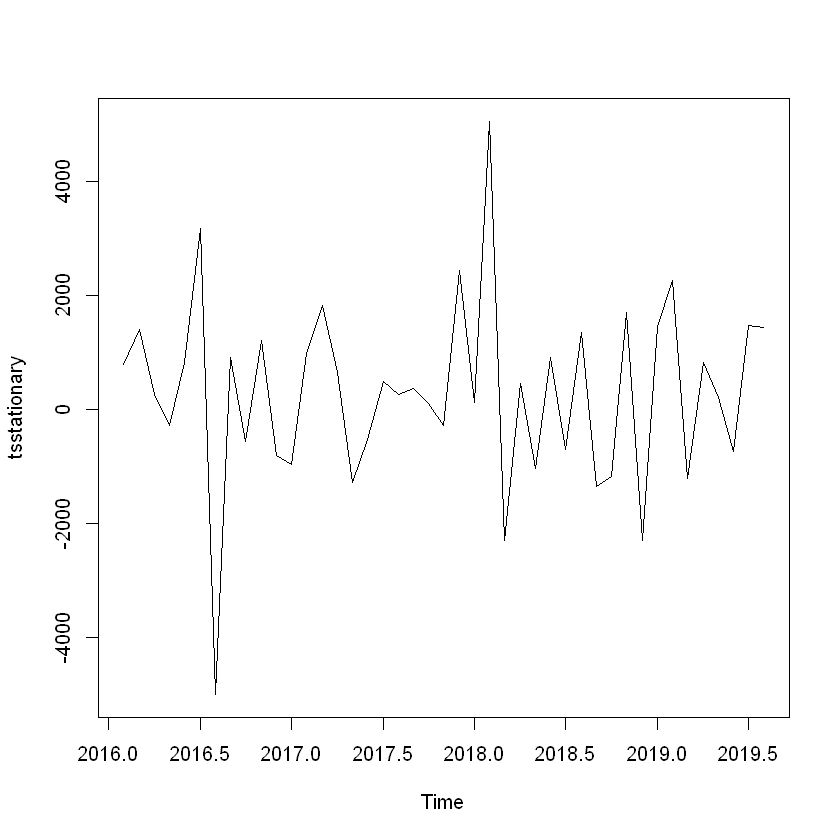

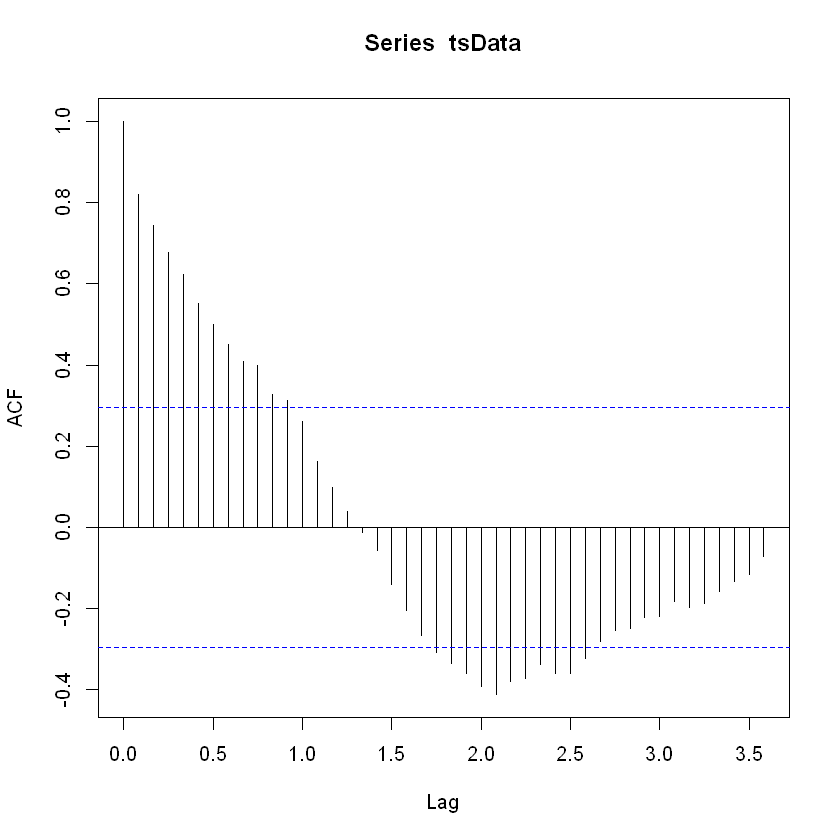

In [70]:
#detemine stationarity of data
urkpssTest(tsData, type = c("tau"), lags = c("short"),use.lag = NULL, doplot = TRUE)
tsstationary<-diff(tsData, differences=1)
plot(tsstationary)
acf(tsData,lag.max=56)

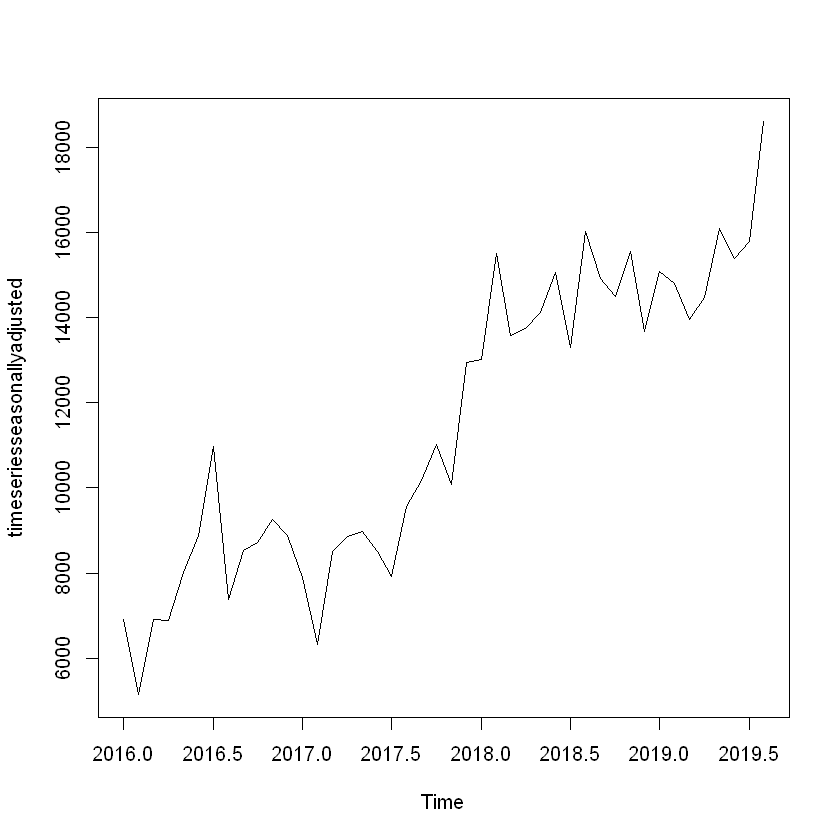

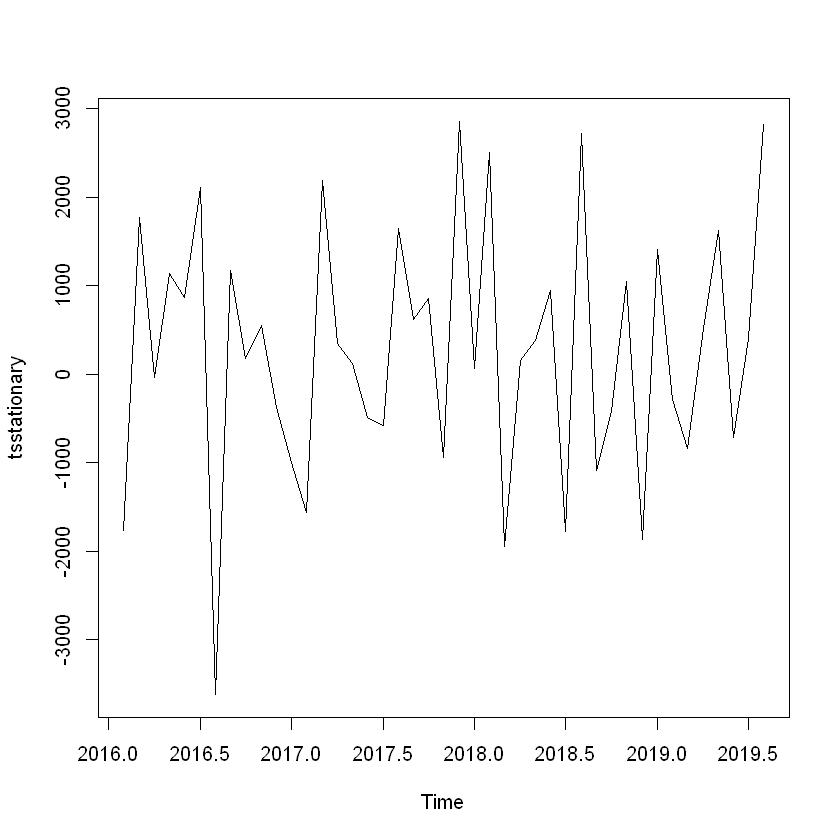

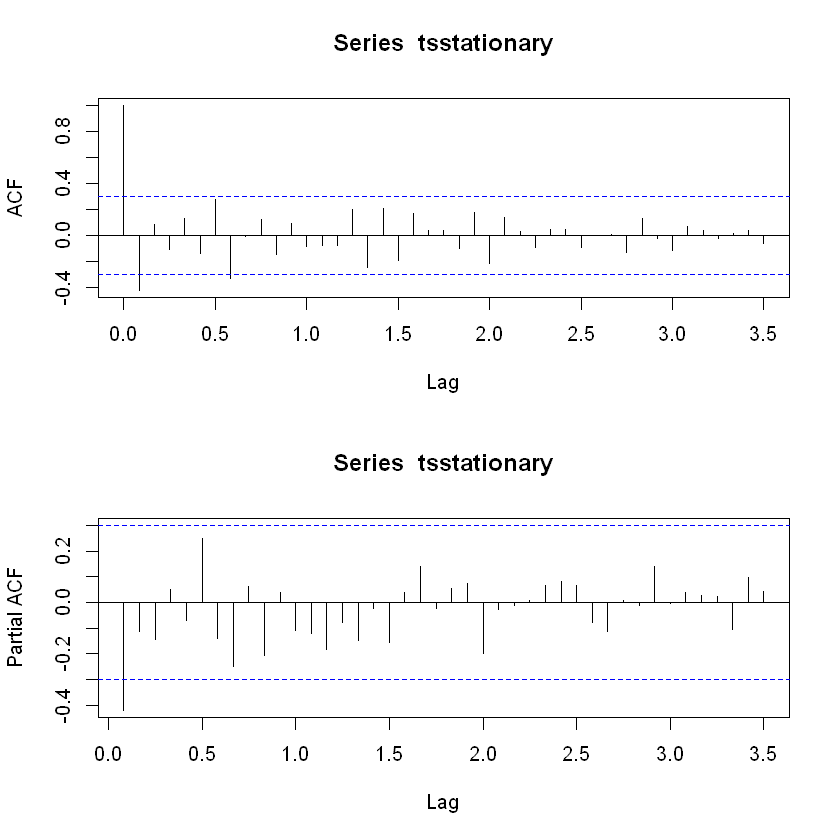

In [71]:
#remove seasonality
timeseriesseasonallyadjusted <- tsData- timeseriescomponents$seasonal
plot(timeseriesseasonallyadjusted)
tsstationary <- diff(timeseriesseasonallyadjusted, differences=1)
plot(tsstationary)
par(mfrow=c(2,1))
acf(tsstationary, lag.max=56) 
pacf(tsstationary, lag.max=56)

In [72]:
#fit the model
fitARIMA<-arima(tsData, order=c(0,1,1),seasonal = list(order = c(1,0,0), period = 12),method="ML")
fitARIMA


Call:
arima(x = tsData, order = c(0, 1, 1), seasonal = list(order = c(1, 0, 0), period = 12), 
    method = "ML")

Coefficients:
          ma1    sar1
      -0.3784  0.1973
s.e.   0.1385  0.1719

sigma^2 estimated as 2277225:  log likelihood = -376.06,  aic = 758.11


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)   
ma1  -0.37844    0.13848 -2.7328  0.00628 **
sar1  0.19730    0.17187  1.1480  0.25098   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


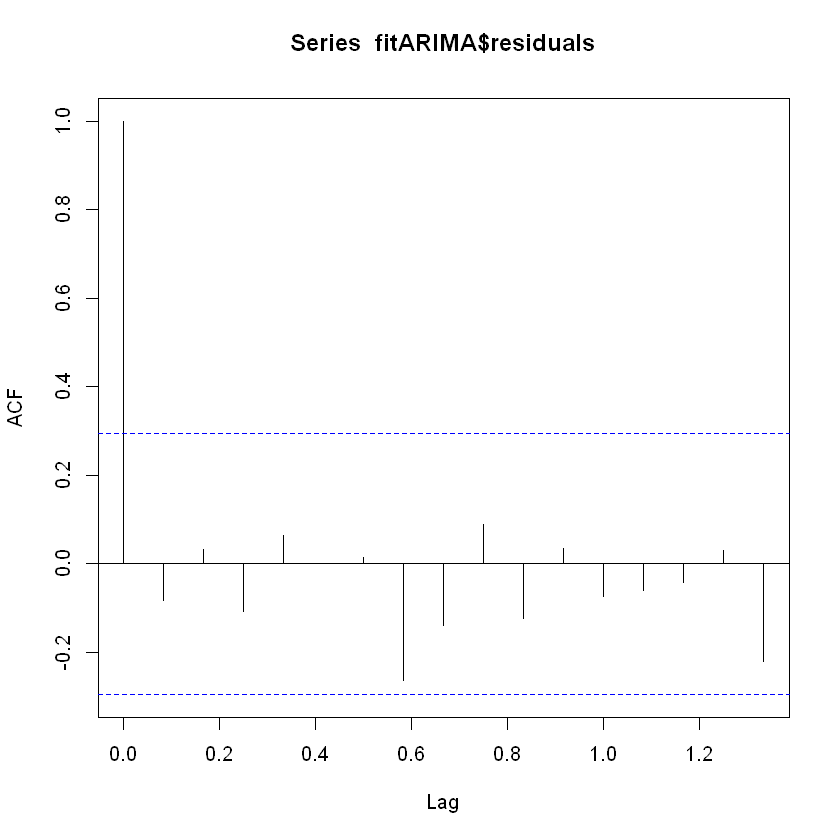

In [73]:
#significance of coefficients
coeftest(fitARIMA)
par(mfrow=c(1,1))
acf(fitARIMA$residuals)

In [74]:
confint(fitARIMA)

2.5 %      97.5 %    
ma1  -0.6498635 -0.1070203
sar1 -0.1395552  0.5341611

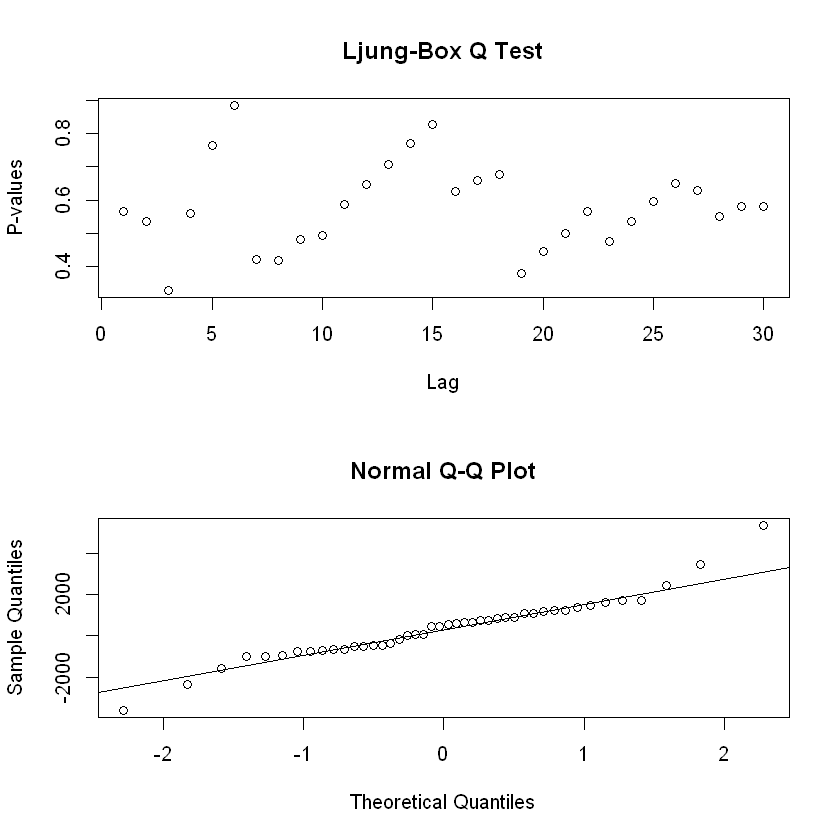

In [75]:
#residual diagnostics
boxresult<-LjungBoxTest (fitARIMA$residuals,k=2,StartLag=1) # residual?? or the original series?
par(mfrow=c(2,1))
plot(boxresult[,3],main="Ljung-Box Q Test", ylab="P-values", xlab="Lag")
qqnorm(fitARIMA$residuals)
qqline(fitARIMA$residuals)


In [76]:
auto.arima(tsData, trace=TRUE)


 ARIMA(2,1,2)(1,0,1)[12] with drift         : Inf
 ARIMA(0,1,0)            with drift         : 761.8678
 ARIMA(1,1,0)(1,0,0)[12] with drift         : 759.207
 ARIMA(0,1,1)(0,0,1)[12] with drift         : 758.4423
 ARIMA(0,1,0)                               : 761.0158
 ARIMA(0,1,1)            with drift         : 756.337
 ARIMA(0,1,1)(1,0,0)[12] with drift         : 758.4215
 ARIMA(0,1,1)(1,0,1)[12] with drift         : 760.9807
 ARIMA(1,1,1)            with drift         : Inf
 ARIMA(0,1,2)            with drift         : 758.7667
 ARIMA(1,1,0)            with drift         : 757.2869
 ARIMA(1,1,2)            with drift         : Inf
 ARIMA(0,1,1)                               : 757.6692

 Best model: ARIMA(0,1,1)            with drift         



Series: tsData 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1     drift
      -0.4583  262.0257
s.e.   0.1518  124.8289

sigma^2 estimated as 2279927:  log likelihood=-374.86
AIC=755.72   AICc=756.34   BIC=761.01

$pred
          Jan      Feb Mar Apr May Jun Jul Aug      Sep      Oct      Nov
2019                                           17381.85 17151.80 17487.41
2020 17319.90 17766.00                                                   
          Dec
2019 17034.01
2020         

$se
          Jan      Feb Mar Apr May Jun Jul Aug      Sep      Oct      Nov
2019                                           1509.048 1776.794 2009.171
2020 2407.552 2583.811                                                   
          Dec
2019 2217.327
2020

         Point Forecast   Lo 99.5  Hi 99.5
Sep 2019       17381.85 13145.905 21617.80
Oct 2019       17151.80 12164.278 22139.32
Nov 2019       17487.41 11847.601 23127.22
Dec 2019       17034.01 10809.898 23258.12
Jan 2020       17319.90 10561.820 24077.98
Feb 2020       17766.00 10513.158 25018.85
Mar 2020       17528.25  9812.305 25244.20
Apr 2020       17690.04  9537.253 25842.83
May 2020       17731.47  9164.092 26298.86
Jun 2020       17584.68  8621.861 26547.50
Jul 2020       17876.49  8534.959 27218.02
Aug 2020       18160.02  8454.536 27865.50

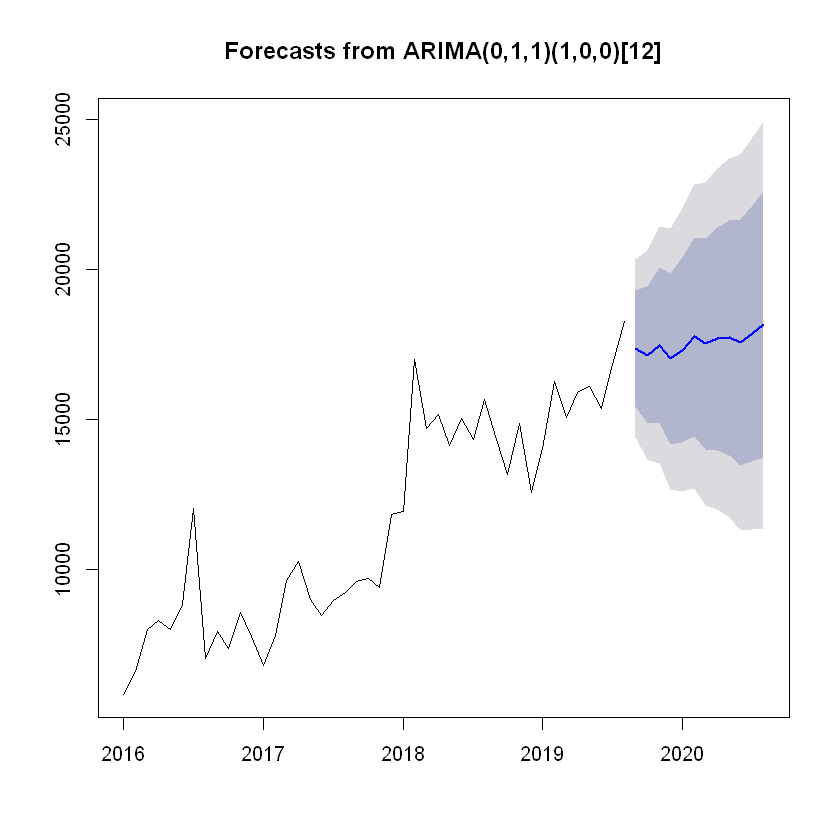

In [77]:
#forcast future values
par(mfrow=c(1,1))
predict(fitARIMA,n.ahead = 6)
#futurVal <- forecast.Arima(fitARIMA,h=10, level=c(99.5))
#plot.forecast(futurVal)
forecast(fitARIMA, h=12, level=c(99.5))
plot(forecast(fitARIMA, h=12))